In [2]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.datasets import make_gaussian_quantiles

In [6]:
N = 1000
quantiles = make_gaussian_quantiles(mean         = None,
                                    cov          =  0.1,
                                    n_samples    =    N,
                                    n_features   =    2,
                                    n_classes    =    2,
                                    shuffle      = True,
                                    random_state = None,
                                                        )

In [ ]:
help(make_gaussian_quantiles)

In [72]:
X, Y = quantiles
lr = 0.0001
Y.shape

(1000,)

In [73]:
Y = Y[:, np.newaxis]

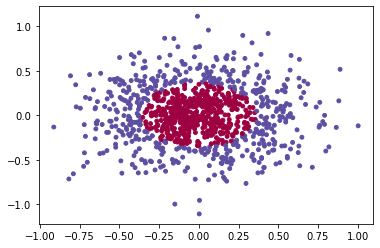

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=15, cmap=plt.cm.Spectral )

Activation Functions:

In [66]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x <= 0] = 0
        x[x >  0] = 1
        return x
    else:
        return np.maximum(0,x)

Loss functions

In [84]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return 2*(y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

Creating random parameters for the network layers

In [12]:
def initialize_parameters(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2)-1 
        parameters['b'+str(l+1)] = (np.random.rand(      1      ,layers_dim[l+1])*2)-1 
    return parameters

In [13]:
layers_dim = [2,4,8,1]
params = initialize_parameters(layers_dim)
params

{'W1': array([[-0.40759562,  0.00584821,  0.83867876,  0.19116027],
        [ 0.32118373,  0.00534417,  0.01618127, -0.50070044]]),
 'b1': array([[ 0.25449698,  0.5104383 ,  0.03298395, -0.80966873]]),
 'W2': array([[ 0.56729882, -0.12970084,  0.46962838,  0.45795364, -0.666097  ,
         -0.4151521 , -0.36053634, -0.75618116],
        [ 0.29108388,  0.29629192,  0.45272945, -0.79016618,  0.43879434,
          0.02620007, -0.22488708, -0.95650856],
        [ 0.71426924,  0.03984284,  0.13433943,  0.581335  ,  0.23890898,
         -0.08244564, -0.41881657, -0.43125992],
        [-0.43691938, -0.10945528, -0.2315064 ,  0.45122878, -0.02538554,
         -0.21018503,  0.14985436,  0.12418143]]),
 'b2': array([[ 0.8094002 , -0.00339778,  0.24373972, -0.46294072,  0.13540164,
          0.67412002, -0.52834415,  0.63965058]]),
 'W3': array([[-0.1632681 ],
        [-0.10979521],
        [ 0.75595843],
        [-0.87690384],
        [ 0.60666331],
        [ 0.3481355 ],
        [-0.9172574 ],


In [30]:
params['W1'].shape

(2, 4)

In [20]:
np.matmul(X,params['W1']).shape # producto punto entre X y W1

(1000, 4)

In [21]:
X@params['W1']

array([[-1.65063282e-02, -2.90783665e-04, -1.92923175e-03,
         2.62996086e-02],
       [ 3.89636156e-03, -2.30362633e-03, -1.60926458e-01,
         7.72331368e-02],
       [-1.82221091e-01,  2.21248194e-03,  3.47592507e-01,
         9.96019096e-02],
       ...,
       [ 7.95424485e-02, -1.29391968e-03, -1.74052331e-01,
        -3.19361216e-02],
       [-9.69417295e-02, -1.68748687e-03, -9.95030929e-03,
         1.53744145e-01],
       [-3.75417781e-01,  7.80806471e-04,  4.59148883e-01,
         3.38068660e-01]])

Forward Training

In [85]:
def train(x_data, lr, params, training=True):
    # Forward
    params['A0'] = x_data

    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
        # Backpropagation

        params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'],True)
        params['dW3'] = params['A2'].T@params['dZ3']

        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = params['A1'].T@params['dZ2']

        params['dZ1'] = (params['dZ2']@params['W2'].T)* relu(params['A1'], True)
        params['dW1'] = params['A0'].T@params['dZ1']

        # Gradient Descent

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * lr
    return output

In [90]:
layers_dim = [2,4,8,1]
params = initialize_parameters(layers_dim)
errors = []
for _ in range(150000):
    output = train(X,0.00001,params)
    if _ % 25 == 0:
        errors.append(mse(Y,output))

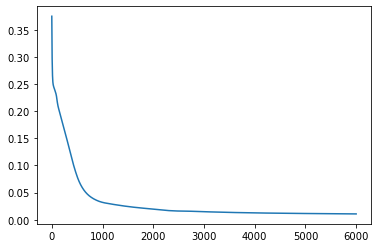

In [110]:
plt.plot(errors)


In [105]:
np.asarray(errors).min()

0.010666535121402105

In [117]:
data_test = (np.random.rand(5000,2)*2)-1
y = train(data_test, 0.00001, params, training=False)

In [118]:
y = np.where(y >= 0.5, 1, 0)

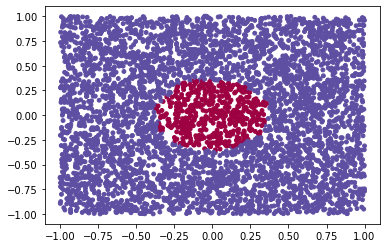

In [119]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=15, cmap=plt.cm.Spectral )